In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def load_bitstamp():
    f = '/home/aahu/Dropbox/black-market-recommender-systems/data/bitstampUSD.csv'
    btp = pd.read_csv(f, header=None, names=['trade_date','trade_price','trade_vol'])
    btp['trade_date'] = pd.to_datetime(btp['trade_date'],unit='s')
    btp = btp[['trade_date', 'trade_price']]
    btp = btp.set_index('trade_date')
    return btp.resample('D', how='mean')

btp = load_bitstamp()

In [4]:
fs = ['/home/aahu/Dropbox/black-market-recommender-systems/data/pandora.tsv',
'/home/aahu/Dropbox/black-market-recommender-systems/data/agora.tsv',
'/home/aahu/Dropbox/black-market-recommender-systems/data/hydra.tsv',
'/home/aahu/Dropbox/black-market-recommender-systems/data/cloudnine.tsv',
'/home/aahu/Dropbox/black-market-recommender-systems/data/silkroad2.tsv',
'/home/aahu/Dropbox/black-market-recommender-systems/data/evolution.tsv']
df = pd.concat([pd.read_csv(f,sep='\t', parse_dates=['scrape_date']) for f in fs])

In [5]:
df[['listing']].drop_duplicates().shape

(175329, 1)

In [6]:
df[['vendor']].drop_duplicates().shape

(9757, 1)

In [7]:
#drop everything unrelated to cash flow

In [8]:
df = df[['price', 'price_btc', 'price_usd', 'scrape_date', 'vendor', 'listing', 'ships_from', 'ships_to']]

In [9]:
group_cols = [c for c in df.columns if c != 'scrape_date']
df = df.groupby(group_cols).min().reset_index()
df

,price,price_btc,price_usd,vendor,listing,ships_from,ships_to,scrape_date
0,999.95 USD each,★,$99999.00,zypper,👌 5g Afghani Gold Seal Hash | Mazar-i-Sharif 👌,worldwide,✈✈World✈✈,2014-08-17
1,999.95 USD each,★,$99999.00,zypper,1kg pure 25c-Nbome with FREE worldwide shipping,worldwide,✈✈World✈✈,2014-05-03
2,999.95 USD each,★,$99999.00,zypper,2500mg 2,worldwide,✈✈World✈✈,2014-07-26
3,999.95 USD each,★,$99999.00,zypper,NandroRapid (Nandrolone Phenyl-prop) 100mg 10 ...,worldwide,✈✈World✈✈,2014-07-26
4,999.95 USD each,★,$99999.00,-BIGG-BALLs-,0.5Gr Molly 81%tested DUTCH QUALITY MDMA **PRO...,worldwide,✈✈World✈✈,2014-09-30
5,999.95 USD each,★,$99999.00,-BIGG-BALLs-,10 tube's of GHB 4ml HIGH Dutch Quallity FREE ...,worldwide,✈✈World✈✈,2014-09-23
6,999.95 USD each,★,$99999.00,-BIGG-BALLs-,1000gram crystalised GHB **FREE SHIPPING**,worldwide,✈✈World✈✈,2014-10-26
7,999.95 USD each,★,$99999.00,-BIGG-BALLs-,1000ml Liquid GHB **Best Price Guarantee**,worldwide,✈✈World✈✈,2014-10-23
8,999.95 USD each,★,$99999.00,-BIGG-BALLs-,100gram crystalised GHB **FREE SHIPPING**,worldwide,✈✈World✈✈,2014-10-06
9,999.95 USD each,★,$99999.00,-BIGG-BALLs-,100ml Liquid GHB **Best Price Guarantee**,worldwide,✈✈World✈✈,2014-09-26


In [10]:
import re
def price_usd_parse(s):
    if pd.isnull(s):
        return None
    if ('btc' in s.lower()) or ('฿' in s):
        return None
    flt = re.findall("\d+\.\d+",s)
    if len(flt) > 0:
        return float(flt[0])
    return None
        
df['price_usd_parsed'] = df['price_usd'].map(price_usd_parse)    

In [11]:
def price_btc_parse(s):
    if pd.isnull(s):
        return None
    if ('usd' in s.lower()) or ('$' in s):
        return None
    flt = re.findall("\d+\.\d+",s)
    if len(flt) > 0:
        return float(flt[0])
    return None
                
df['price_btc_parsed'] = df['price_btc'].map(price_btc_parse)    

In [12]:
def is_btc_price(s):
    if pd.isnull(s):
        return False
    if ('btc' in s.lower()) or ('฿' in s):
        return True
    return False

def is_usd_price(s):
    if pd.isnull(s):
        return False
    if ('usd' in s.lower()) or ('$' in s):
        return True
    return False
    
def price_parse(s):
    if pd.isnull(s):
        return None
    if ('usd' in s.lower()) or ('$' in s):
        return price_usd_parse(s)
    if ('btc' in s.lower()) or ('฿' in s):
        return price_btc_parse(s)
    return None

df['price_btc_parsed2'] = df[df['price'].map(is_btc_price)]['price'].map(price_parse)
df['price_usd_parsed2'] = df[df['price'].map(is_usd_price)]['price'].map(price_parse)

In [13]:
df['price_btc_final'] = df[['price_btc_parsed2', 'price_btc_parsed']].max(axis=1)
df['price_usd_final'] = df[['price_usd_parsed2', 'price_usd_parsed']].max(axis=1)

In [55]:
df[df['price_usd_parsed'] == 99999][['price_usd','price']].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [63]:
dfm = pd.merge(df,btp,left_on='scrape_date',right_index=True)

In [60]:
dfm.shape

(2265306, 15)

In [70]:
dfm = dfm[dfm['price_usd_final'] != 99999 & dfm['price_btc_parsed'].notnull()]
dfm.shape

(2265116, 16)

In [66]:
dfm['converted_btc'] = dfm[['trade_price','price_btc_final']].prod(axis=1)

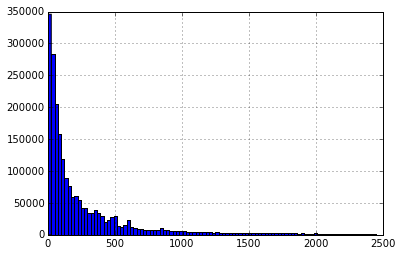

In [68]:
dfm[dfm['converted_btc'] < dfm['converted_btc'].quantile(.95)]['converted_btc'].hist(bins=100)

In [20]:
dfm[dfm['converted_btc'] < dfm['converted_btc'].quantile(.95)].

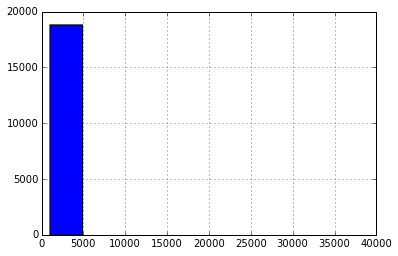

In [72]:
dfm[dfm['price_usd_final'] < dfm['price_usd_final'].quantile(.95)]['price_usd_final'].hist()

In [22]:
#dfm['final_converted_price'] = dfm[['converted_btc', 'price_usd_final']].max(axis=1)

In [26]:
dfm.shape

(19030, 17)